In [ ]:
import os
import json
import pandas as pd
import sys
sys.path.append('..')
from speech_utils import count_strings_containing_digit, string_contains_digit
from pydub import AudioSegment
from datasets import Dataset, DatasetDict, Audio, load_dataset, concatenate_datasets


jt_transcripts = '/mnt/sea/jt_transcripts'
jt_splits = '/mnt/sea/jt_splits'

transcript_files = os.listdir(jt_transcripts)
dirs = [x[:-4] for x in transcript_files]

df = pd.DataFrame()
for d in dirs:
    df = pd.concat([df, pd.read_csv(os.path.join(jt_transcripts, d + '.csv'))])

print(df.shape)
df.head()

In [2]:
count_strings_containing_digit(df['transcript'])

Count: 3902 out of 35313 | Percentage: 11.05%


3902

In [4]:
df['duration'] = (df['end_sr'] - df['start_sr']) / df['sample_rate']


In [6]:
sum(df['duration']) / 3600

83.03314854166666

In [3]:
df.id.nunique()

10

In [ ]:

df['audio'] = df.apply(lambda x: os.path.join(jt_splits, f"{x['id']}/{x['id']}__{x['chunk_index']}__{x['start_sr']}-{x['end_sr']}__{x['sample_rate']}.wav"), axis=1)

df['duration'] = (df['end_sr'] - df['start_sr']) / df['sample_rate']
df['contains_digit'] = df['transcript'].apply(string_contains_digit)
print(df.shape)
df = df[~df['contains_digit']]
df = df.drop(columns=['id', 'chunk_index', 'start_sr', 'end_sr', 'sample_rate', 'contains_digit'])
df = df.rename(columns={'transcript': 'text'})
df['source'] = 'jt'

df.head()

<Axes: >

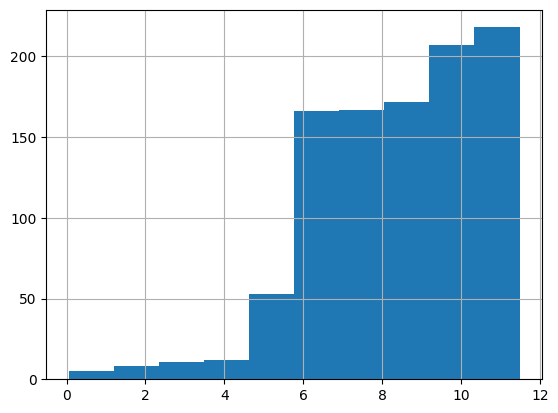

In [7]:
df['duration'].hist()

In [6]:
ds = DatasetDict({'train': Dataset.from_pandas(df.reset_index(drop=True))})
ds = ds.cast_column('audio', Audio(sampling_rate=16000))

ds.save_to_disk('../_JT_sample')

Saving the dataset (0/2 shards):   0%|          | 0/1019 [00:00<?, ? examples/s]

In [8]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'audio', 'duration', 'source'],
        num_rows: 1019
    })
})

In [9]:
# unique chars
chars = set()
for i, row in df.iterrows():
    chars.update(set(row['text']))

chars = sorted(list(chars))
print(chars)

[' ', "'", ',', '-', '.', '?', 'A', 'I', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'z', 'ं', 'अ', 'आ', 'इ', 'उ', 'ए', 'ओ', 'औ', 'क', 'ग', 'च', 'ज', 'ट', 'ड', 'त', 'थ', 'द', 'न', 'प', 'फ', 'ब', 'म', 'य', 'र', 'ल', 'व', 'श', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'े', 'ै', 'ॉ', 'ो', '्', '।', 'ਂ', 'ਅ', 'ਆ', 'ਇ', 'ਈ', 'ਉ', 'ਊ', 'ਏ', 'ਐ', 'ਓ', 'ਔ', 'ਕ', 'ਖ', 'ਗ', 'ਘ', 'ਚ', 'ਛ', 'ਜ', 'ਝ', 'ਟ', 'ਠ', 'ਡ', 'ਢ', 'ਣ', 'ਤ', 'ਥ', 'ਦ', 'ਧ', 'ਨ', 'ਪ', 'ਫ', 'ਬ', 'ਭ', 'ਮ', 'ਯ', 'ਰ', 'ਲ', 'ਵ', 'ਸ਼', 'ਸ', 'ਹ', '਼', 'ਾ', 'ਿ', 'ੀ', 'ੁ', 'ੂ', 'ੇ', 'ੈ', 'ੋ', 'ੌ', '੍', 'ਜ਼', 'ੜ', 'ੰ', 'ੱ', 'ం', 'అ', 'ఆ', 'ఇ', 'ఉ', 'ఎ', 'ఏ', 'ఐ', 'క', 'ఖ', 'గ', 'చ', 'జ', 'ట', 'డ', 'త', 'థ', 'ద', 'న', 'ప', 'ఫ', 'బ', 'మ', 'య', 'ర', 'ల', 'వ', 'శ', 'ష', 'స', 'హ', 'ా', 'ి', 'ీ', 'ు', 'ూ', 'ె', 'ే', 'ై', 'ో', 'ౌ', '్']
